In [3]:
## Packages and Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv("./ham10000_metadata.csv")

Number of rows and columns: (10015, 7)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None

First five rows of the dataset:
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  I

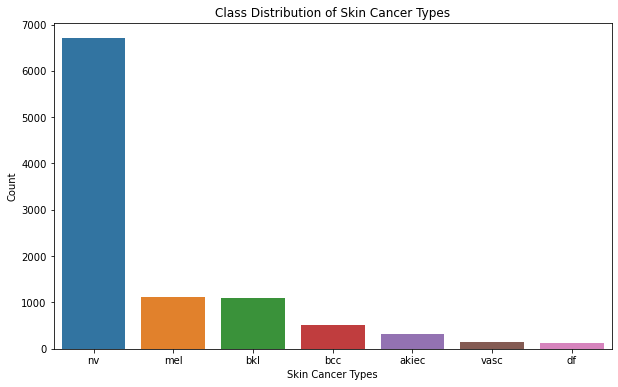

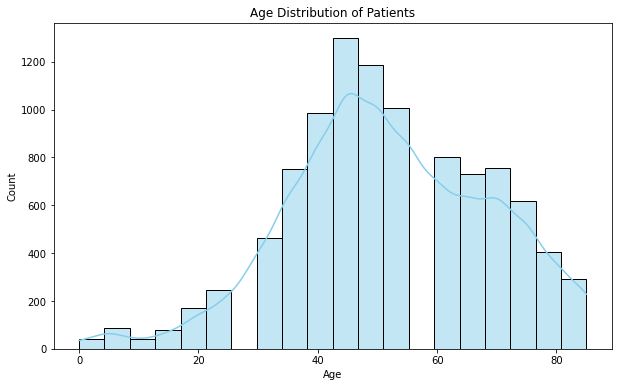

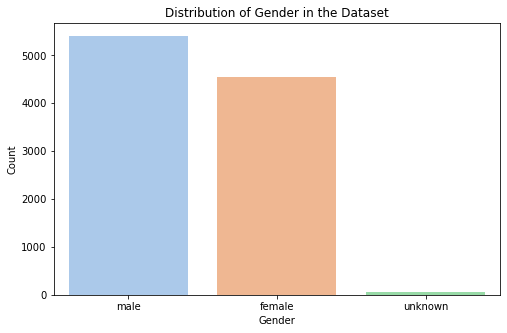

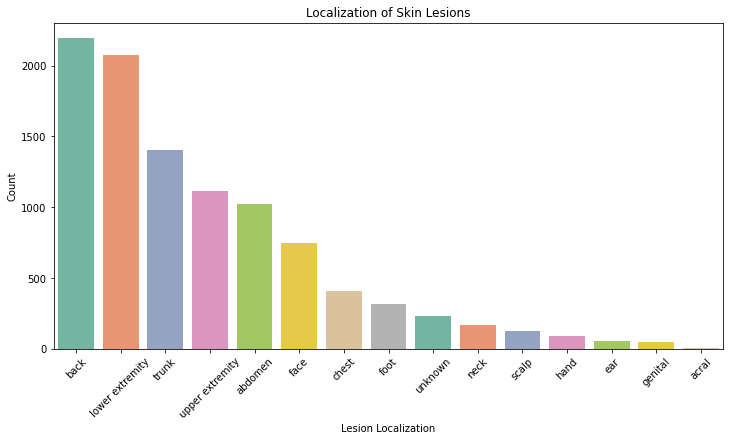

In [4]:
## Basic Info

print("Number of rows and columns:", data.shape)

print("\nDataset Information:")
print(data.info())

print("\nFirst five rows of the dataset:")
print(data.head())

print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Class distribution of skin cancer types
plt.figure(figsize=(10, 6))
sns.countplot(x='dx', data=data, order=data['dx'].value_counts().index)
plt.title('Class Distribution of Skin Cancer Types')
plt.xlabel('Skin Cancer Types')
plt.ylabel('Count')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Sex distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=data, palette='pastel')
plt.title('Distribution of Gender in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Localization of skin lesions
plt.figure(figsize=(12, 6))
sns.countplot(x='localization', data=data, order=data['localization'].value_counts().index, palette='Set2')
plt.title('Localization of Skin Lesions')
plt.xlabel('Lesion Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 864x432 with 0 Axes>

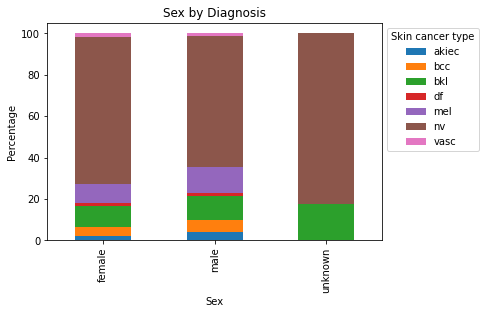

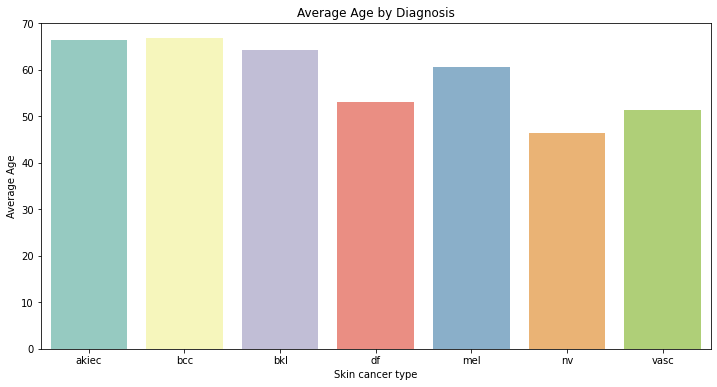

<Figure size 1152x576 with 0 Axes>

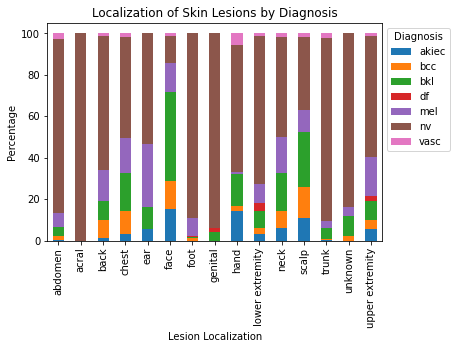

In [13]:
## Correlation and Relationships

# -- Sex / Skin cancer type --
sex_diagnosis_cross_tab = pd.crosstab(data['sex'], data['dx'])
sex_diagnosis_percentage = sex_diagnosis_cross_tab.div(sex_diagnosis_cross_tab.sum(axis=1), axis=0) * 100
# Plot
plt.figure(figsize=(12, 6))
sex_diagnosis_percentage.plot(kind='bar', stacked=True)
plt.title('Sex by Diagnosis')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend(title='Skin cancer type', bbox_to_anchor=(1, 1))
plt.show()

# -- Age / Skin cancer type --
average_age_by_diagnosis = data.groupby('dx')['age'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='dx', y='age', data=average_age_by_diagnosis, palette='Set3')
plt.title('Average Age by Diagnosis')
plt.xlabel('Skin cancer type')
plt.ylabel('Average Age')
plt.show()

# -- Localization / Skin cancer type --
localization_diagnosis_cross_tab = pd.crosstab(data['localization'], data['dx'])

# Normalize the values to get percentages
localization_diagnosis_percentage = localization_diagnosis_cross_tab.div(localization_diagnosis_cross_tab.sum(axis=1), axis=0) * 100
# Plot
plt.figure(figsize=(16, 8))
localization_diagnosis_percentage.plot(kind='bar', stacked=True)
plt.title('Localization of Skin Lesions by Diagnosis')
plt.xlabel('Lesion Localization')
plt.ylabel('Percentage')
plt.legend(title='Skin cancer type', bbox_to_anchor=(1, 1))
plt.show()

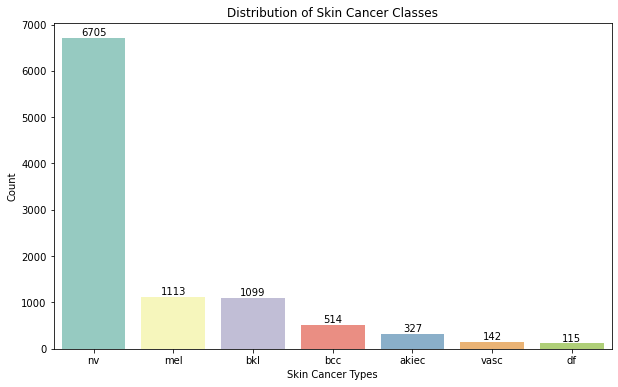

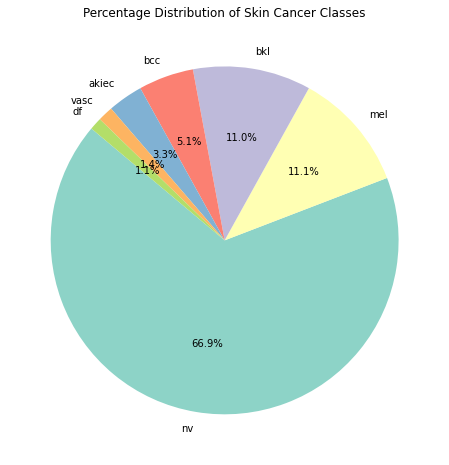

In [6]:
## Data Imbalance

class_distribution = data['dx'].value_counts()

# Distribution of classes
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='Set3')
plt.title('Distribution of Skin Cancer Classes')
plt.xlabel('Skin Cancer Types')
plt.ylabel('Count')

# Annotate the bars with class frequencies
for i, count in enumerate(class_distribution):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

# Percentage distribution with pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Percentage Distribution of Skin Cancer Classes')
plt.show()

# Abbreviation:
# akiec: atinic keratoses and intraepithelial carcinoma / Bowen’s disease bcc: basal cell carcinoma
# bkl: benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses)
# df: dermatofibroma 
# mel: melanoma
# nv: melanocytic nevi
# vasc: vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage)

Class distribution before SMOTE:
nv       5367
mel       887
bkl       871
bcc       421
akiec     258
vasc      121
df         87
Name: dx, dtype: int64


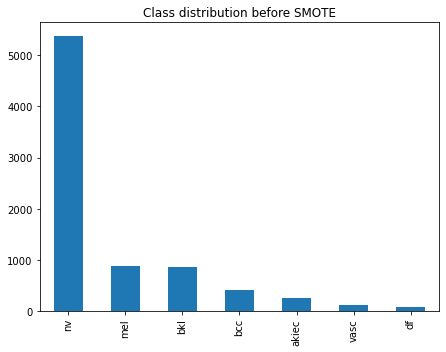


Class distribution after SMOTE:
nv       5367
bkl      5367
akiec    5367
df       5367
mel      5367
bcc      5367
vasc     5367
Name: dx, dtype: int64


In [30]:
## Balancing
# The dataset is imbalanced on diagnosis and localization distribution

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Separate features and labels
X = data.drop(['dx', 'lesion_id', 'image_id'], axis=1)

# Impute missing values for numerical columns with the mean
numerical_cols = ['age']
numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])

# Impute missing values for categorical columns with a constant value
categorical_cols = ['dx_type', 'sex', 'localization']
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Target variable
y = data['dx']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



# Display the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Plot the class distribution before SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Class distribution before SMOTE")
y_train.value_counts().plot(kind='bar')

plt.tight_layout()
plt.show()

# Display the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())